<a href="https://colab.research.google.com/github/RMCV-Rajapaksha/TeamInception_Datathon/blob/main/task2_eda_and_data_preprocessing_LSTM_2_Without_sections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Notebook for "insert model name here"


## Imports and Setup

**Import the Libararies**


In [19]:
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

### Connecting to Google Drive

In [20]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading data set files

In [21]:
# Developers please update the paths according to were in your google you place datasets
# i recommend making Rootcode-ML folder and in it Datasets folder and placing the csv files there then you wont have to change below code block
bookings_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/bookings_train.csv')
tasks_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/tasks.csv')
staffing_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/staffing_train.csv')

In [22]:
bookings_data.head()

,booking_id,citizen_id,booking_date,appointment_date,appointment_time,check_in_time,check_out_time,task_id,num_documents,queue_number,satisfaction_rating
0,f7b59ba3793fea61282cb02be2247cebd0a75306,4229044420,2021-01-01,2021-01-01,09:03,2021-01-01 09:11:00,2021-01-01 09:48:15.166353269,TASK-002,0,2,4
1,cfe30d53b4b645e4cb6b114f6c9d74a0f25e6a80,5389442635,2021-01-01,2021-01-01,09:12,2021-01-01 09:24:00,2021-01-01 10:24:12.189261137,TASK-001,1,1,4
2,0fb0a5d9b3944dd743a9e7828dc03fa74aa6ebf8,2123783919,2021-01-01,2021-01-01,09:36,2021-01-01 09:29:00,2021-01-01 10:26:48.802260864,TASK-002,1,6,5
3,d4bf826153212fa325ad98b215668ab942365607,6359918966,2021-01-01,2021-01-01,09:45,2021-01-01 10:07:00,2021-01-01 11:00:13.485642822,TASK-001,1,4,4
4,ebb4c9687acbaf65376d8e379bd1341d1c15127e,178732202,2021-01-01,2021-01-01,10:12,2021-01-01 10:26:00,2021-01-01 11:54:53.260180213,TASK-002,1,8,3


## EDA


### EDA of Bookings data

lets take a look at the columns and some of their values

In [23]:
staffing_data.head()

,date,section_id,employees_on_duty,total_task_time_minutes
0,2021-01-01,SEC-001,1,834.569483
1,2021-01-01,SEC-002,4,1525.368990
2,2021-01-01,SEC-003,2,662.095279
3,2021-01-01,SEC-004,4,1499.112620
4,2021-01-01,SEC-005,3,1238.533073


In [24]:
staffing_data.describe()

,employees_on_duty,total_task_time_minutes
count,5802.000000,5802.000000
mean,4.458807,1662.296769
std,2.794417,1147.134643
min,1.000000,91.109596
25%,3.000000,859.104314
50%,4.000000,1358.176924
75%,6.000000,2123.936358
max,26.000000,10658.173092


removing unnecessary columns. We wont need the total_task_time_minutes because this data wont be provided as input from the test datasets. We need the date and section_id  because they will be to calculate the actual target value (the thing to be predicted) for task 2.

In [25]:
staffing_data = staffing_data.drop(['total_task_time_minutes'],axis=1)

now lets look at the new table headers again.


In [26]:
staffing_data.head()

,date,section_id,employees_on_duty
0,2021-01-01,SEC-001,1
1,2021-01-01,SEC-002,4
2,2021-01-01,SEC-003,2
3,2021-01-01,SEC-004,4
4,2021-01-01,SEC-005,3


lets get a better idea of how null values have been distributed amoung the columns

In [27]:
staffing_data.isna().sum()

,0
date,0
section_id,0
employees_on_duty,0


## Data Preprocessing


### Rearrangement and processing of columns

### Dataset seperation according to section_id

In [28]:
task_counts = staffing_data.groupby("section_id").size().reset_index(name="count")
task_counts

,section_id,count
0,SEC-001,967
1,SEC-002,967
2,SEC-003,967
3,SEC-004,967
4,SEC-005,967
5,SEC-006,967


In [29]:
sec_1_data = staffing_data[staffing_data['section_id'] == 'SEC-001'].copy()
sec_2_data = staffing_data[staffing_data['section_id'] == 'SEC-002'].copy()
sec_3_data = staffing_data[staffing_data['section_id'] == 'SEC-003'].copy()
sec_4_data = staffing_data[staffing_data['section_id'] == 'SEC-004'].copy()
sec_5_data = staffing_data[staffing_data['section_id'] == 'SEC-005'].copy()
sec_6_data = staffing_data[staffing_data['section_id'] == 'SEC-006'].copy()


In [30]:
sec_6_data.head()

,date,section_id,employees_on_duty
5,2021-01-01,SEC-006,11
11,2021-01-04,SEC-006,6
17,2021-01-05,SEC-006,5
23,2021-01-06,SEC-006,10
29,2021-01-07,SEC-006,5


In [31]:
combined_staffing_data = pd.concat([sec_1_data, sec_2_data, sec_3_data, sec_4_data, sec_5_data, sec_6_data])
display(combined_staffing_data.head())

,date,section_id,employees_on_duty
0,2021-01-01,SEC-001,1
6,2021-01-04,SEC-001,1
12,2021-01-05,SEC-001,4
18,2021-01-06,SEC-001,2
24,2021-01-07,SEC-001,2


In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'section_id' column
staffing_data['section_id_encoded'] = label_encoder.fit_transform(staffing_data['section_id'])

# Display the updated dataframe with the new encoded column
display(staffing_data.head())

,date,section_id,employees_on_duty,section_id_encoded
0,2021-01-01,SEC-001,1,0
1,2021-01-01,SEC-002,4,1
2,2021-01-01,SEC-003,2,2
3,2021-01-01,SEC-004,4,3
4,2021-01-01,SEC-005,3,4


Sample of staffing data:
        date section_id  employees_on_duty  section_id_encoded
0 2021-01-01    SEC-001                 13                   0
1 2021-01-01    SEC-002                 12                   1
2 2021-01-01    SEC-003                 11                   2
3 2021-01-01    SEC-004                  9                   3
4 2021-01-01    SEC-005                 10                   4

Data shape: (6570, 4)
Date range: 2021-01-01 00:00:00 to 2023-12-31 00:00:00

Sequence data shape:
X shape: (6390, 30, 13)
y shape: (6390,)

Train-Test Split:
X_train shape: (5112, 30, 13)
X_test shape: (1278, 30, 13)
y_train shape: (5112,)
y_test shape: (1278,)

Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 30, 100)        │        45,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,101 (301.18 KB)

 Trainable params: 77,101 (301.18 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0862 - mae: 0.2193 - val_loss: 0.0240 - val_mae: 0.1295
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0265 - mae: 0.1330 - val_loss: 0.0235 - val_mae: 0.1287
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0258 - mae: 0.1316 - val_loss: 0.0244 - val_mae: 0.1303
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0244 - mae: 0.1284 - val_loss: 0.0232 - val_mae: 0.1275
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0245 - mae: 0.1296 - val_loss: 0.0249 - val_mae: 0.1313
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0227 - mae: 0.1239 - val_loss: 0.0225 - val_mae: 0.1260
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0229 - mae: 0.1262 - val_loss: 0.0238 - val_mae: 0.1285
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0225 - mae: 0.1250 - val_loss: 0.0217 - val_mae: 0.1239
Epoch 9/100
128/1

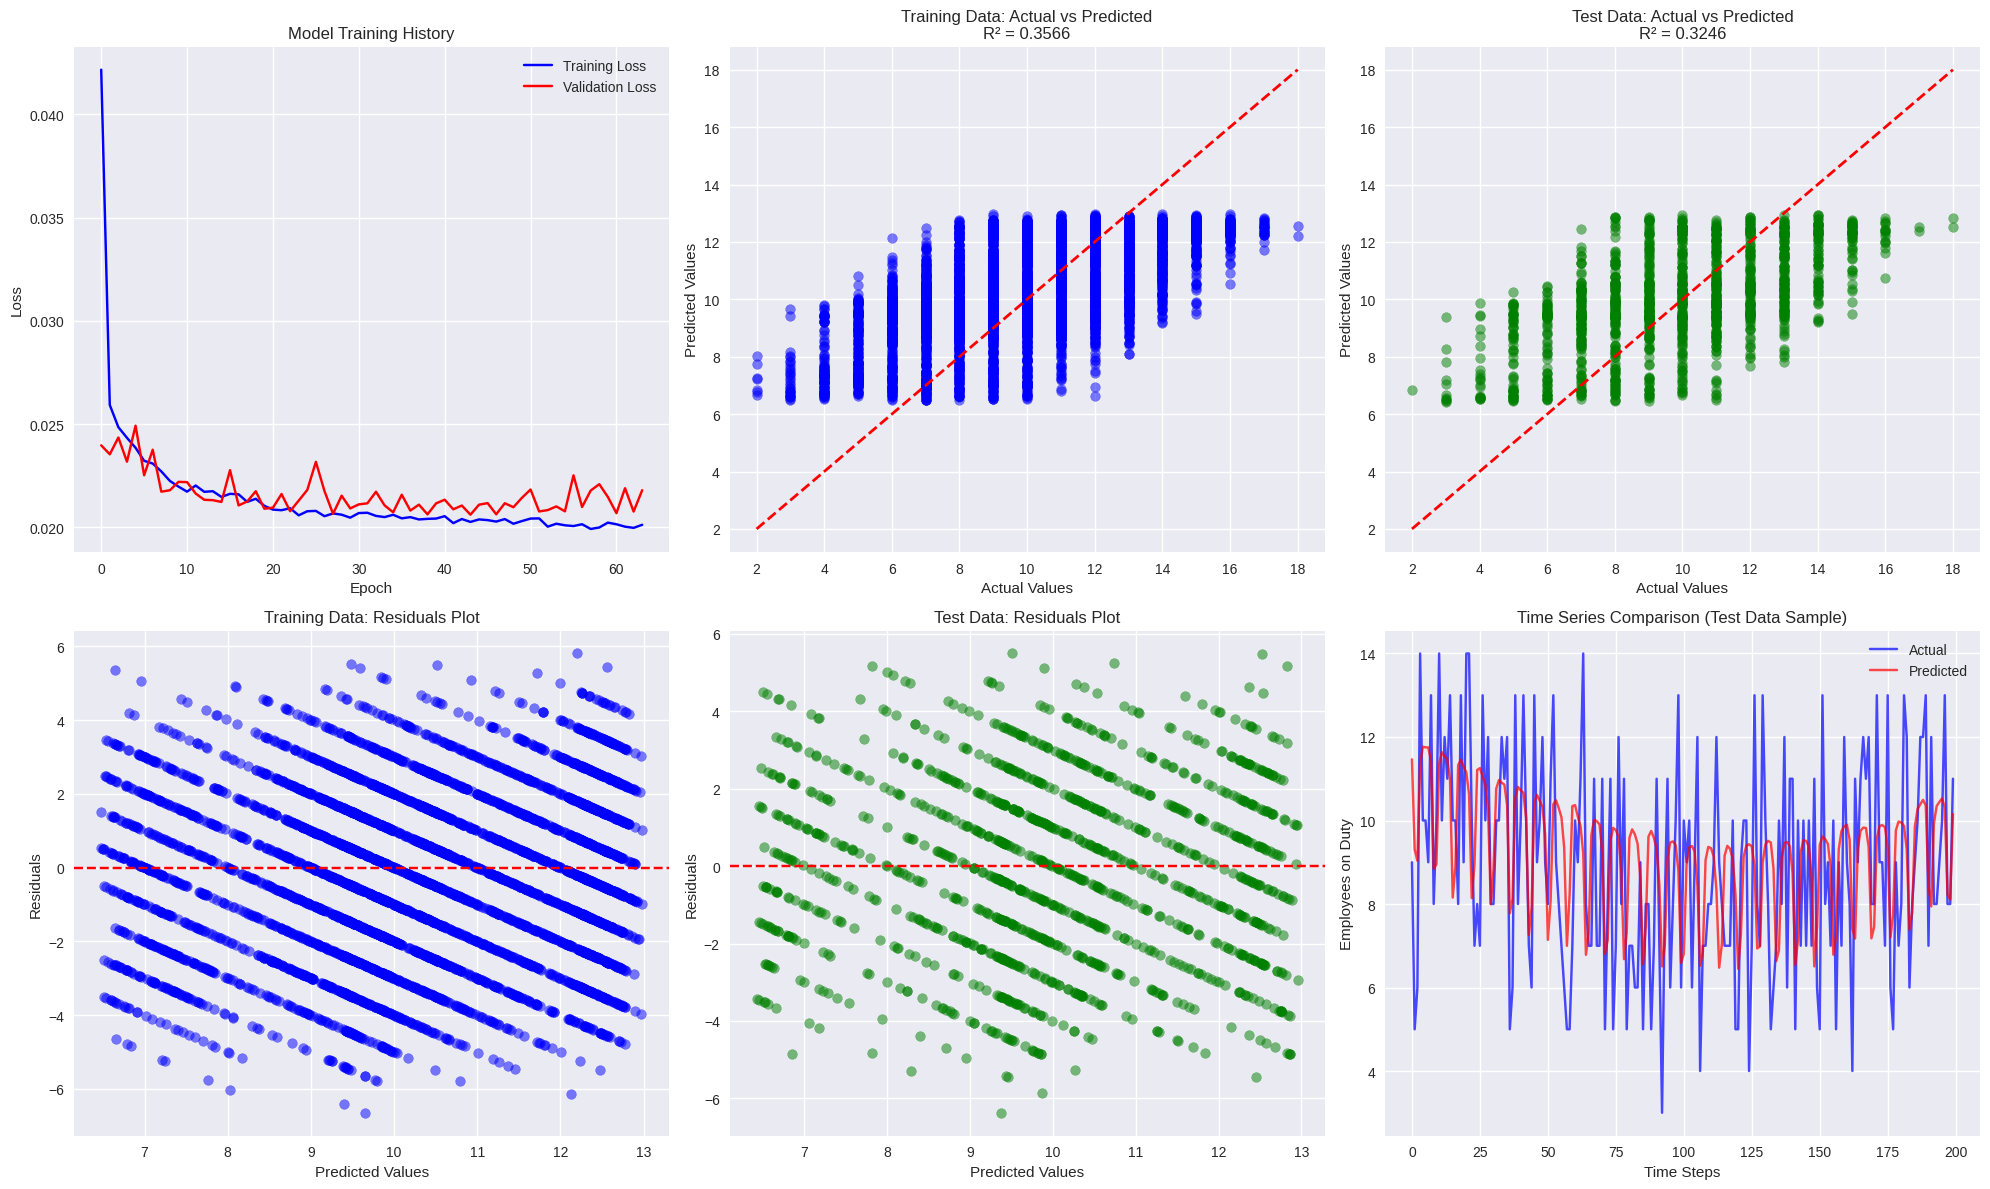


COMPREHENSIVE METRICS SUMMARY
           Training    Testing
MSE        5.187563   5.556610
RMSE       2.277622   2.357246
MAE        1.906221   1.981606
R²         0.356636   0.324566
MAPE (%)  23.061055  23.782262

Additional Accuracy Metrics:
Predictions within 1 employee:
  Training: 28.4%
  Testing: 54.5%
Predictions within 2 employees:
  Training: 56.0%
  Testing: 54.5%

Model Training Complete!
The LSTM model has been successfully trained to predict staffing levels.
Test R² Score: 0.3246
Test MAPE: 23.78%

Feature columns used: ['section_id_encoded', 'year', 'month', 'day', 'dayofweek', 'dayofyear', 'quarter', 'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos', 'dayofyear_sin', 'dayofyear_cos']
Sequence length: 30 days
Training samples: 5112
Testing samples: 1278


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# Assuming your combined_staffing_data is already created
# For demonstration, I'll create sample data structure based on your output
np.random.seed(42)

# Create sample data (replace this with your actual combined_staffing_data)
dates = pd.date_range(start='2021-01-01', end='2023-12-31', freq='D')
sections = ['SEC-001', 'SEC-002', 'SEC-003', 'SEC-004', 'SEC-005', 'SEC-006']

# Generate sample data
data_list = []
for date in dates:
    for section in sections:
        # Simulate realistic staffing patterns with some seasonality and randomness
        base_staff = np.random.randint(8, 15)
        seasonal_effect = 2 * np.sin(2 * np.pi * date.dayofyear / 365)
        weekend_effect = -2 if date.weekday() >= 5 else 0
        employees = max(1, int(base_staff + seasonal_effect + weekend_effect + np.random.normal(0, 1)))

        data_list.append({
            'date': date,
            'section_id': section,
            'employees_on_duty': employees
        })

staffing_data = pd.DataFrame(data_list)

# Apply label encoding to section_id
label_encoder = LabelEncoder()
staffing_data['section_id_encoded'] = label_encoder.fit_transform(staffing_data['section_id'])

print("Sample of staffing data:")
print(staffing_data.head())
print(f"\nData shape: {staffing_data.shape}")
print(f"Date range: {staffing_data['date'].min()} to {staffing_data['date'].max()}")

# Feature Engineering
def create_features(df):
    """Create time-based features from date column"""
    df = df.copy()
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofyear'] = df['date'].dt.dayofyear
    df['quarter'] = df['date'].dt.quarter

    # Create cyclical features for better LSTM performance
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
    df['dayofyear_sin'] = np.sin(2 * np.pi * df['dayofyear'] / 365)
    df['dayofyear_cos'] = np.cos(2 * np.pi * df['dayofyear'] / 365)

    return df

# Create features
staffing_data = create_features(staffing_data)

# Select features for LSTM
feature_columns = [
    'section_id_encoded', 'year', 'month', 'day', 'dayofweek', 'dayofyear', 'quarter',
    'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos',
    'dayofyear_sin', 'dayofyear_cos'
]

# Prepare data for LSTM
def create_sequences(data, target, features, sequence_length=30):
    """Create sequences for LSTM training"""
    X, y = [], []

    # Sort data by section and date to maintain temporal order
    data_sorted = data.sort_values(['section_id_encoded', 'date'])

    # Create sequences for each section separately
    for section in data_sorted['section_id_encoded'].unique():
        section_data = data_sorted[data_sorted['section_id_encoded'] == section]

        for i in range(sequence_length, len(section_data)):
            # Features for the sequence
            X.append(section_data[features].iloc[i-sequence_length:i].values)
            # Target value
            y.append(section_data[target].iloc[i])

    return np.array(X), np.array(y)

# Create sequences
sequence_length = 30  # Use 30 days of historical data to predict next day
X, y = create_sequences(staffing_data, 'employees_on_duty', feature_columns, sequence_length)

print(f"\nSequence data shape:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print(f"\nTrain-Test Split:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Scale the features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Reshape for scaling
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])

# Fit and transform
X_train_scaled = scaler_X.fit_transform(X_train_reshaped).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test_reshaped).reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Build LSTM Model
def build_lstm_model(input_shape):
    """Build and compile LSTM model"""
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model

# Create and compile model
model = build_lstm_model((X_train_scaled.shape[1], X_train_scaled.shape[2]))

print("\nModel Summary:")
model.summary()

# Train the model
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

print("\nTraining the model...")
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Make predictions
print("\nMaking predictions...")
y_train_pred_scaled = model.predict(X_train_scaled)
y_test_pred_scaled = model.predict(X_test_scaled)

# Inverse transform predictions
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Calculate metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    """Calculate and print various metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Mean Absolute Percentage Error
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{dataset_name} Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

# Calculate metrics for both training and testing data
train_metrics = calculate_metrics(y_train, y_train_pred.flatten(), "Training")
test_metrics = calculate_metrics(y_test, y_test_pred.flatten(), "Testing")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Training History
axes[0, 0].plot(history.history['loss'], label='Training Loss', color='blue')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', color='red')
axes[0, 0].set_title('Model Training History')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# 2. Training Predictions vs Actual
axes[0, 1].scatter(y_train, y_train_pred, alpha=0.5, color='blue')
axes[0, 1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].set_title(f'Training Data: Actual vs Predicted\nR² = {train_metrics["R2"]:.4f}')
axes[0, 1].grid(True)

# 3. Test Predictions vs Actual
axes[0, 2].scatter(y_test, y_test_pred, alpha=0.5, color='green')
axes[0, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 2].set_xlabel('Actual Values')
axes[0, 2].set_ylabel('Predicted Values')
axes[0, 2].set_title(f'Test Data: Actual vs Predicted\nR² = {test_metrics["R2"]:.4f}')
axes[0, 2].grid(True)

# 4. Residuals Plot - Training
train_residuals = y_train - y_train_pred.flatten()
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.5, color='blue')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training Data: Residuals Plot')
axes[1, 0].grid(True)

# 5. Residuals Plot - Testing
test_residuals = y_test - y_test_pred.flatten()
axes[1, 1].scatter(y_test_pred, test_residuals, alpha=0.5, color='green')
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Test Data: Residuals Plot')
axes[1, 1].grid(True)

# 6. Time Series Comparison (sample)
sample_size = min(200, len(y_test))
sample_indices = np.arange(sample_size)
axes[1, 2].plot(sample_indices, y_test[:sample_size], label='Actual', color='blue', alpha=0.7)
axes[1, 2].plot(sample_indices, y_test_pred[:sample_size], label='Predicted', color='red', alpha=0.7)
axes[1, 2].set_xlabel('Time Steps')
axes[1, 2].set_ylabel('Employees on Duty')
axes[1, 2].set_title('Time Series Comparison (Test Data Sample)')
axes[1, 2].legend()
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()

# Create metrics comparison chart
metrics_df = pd.DataFrame({
    'Training': [train_metrics['MSE'], train_metrics['RMSE'], train_metrics['MAE'], train_metrics['R2'], train_metrics['MAPE']],
    'Testing': [test_metrics['MSE'], test_metrics['RMSE'], test_metrics['MAE'], test_metrics['R2'], test_metrics['MAPE']]
}, index=['MSE', 'RMSE', 'MAE', 'R²', 'MAPE (%)'])

print("\n" + "="*50)
print("COMPREHENSIVE METRICS SUMMARY")
print("="*50)
print(metrics_df)

# Additional accuracy metrics
def accuracy_within_threshold(y_true, y_pred, threshold=1):
    """Calculate percentage of predictions within threshold"""
    return np.mean(np.abs(y_true - y_pred.flatten()) <= threshold) * 100

train_accuracy_1 = accuracy_within_threshold(y_train, y_train_pred, 1)
test_accuracy_1 = accuracy_within_threshold(y_test, y_test_pred, 1)

train_accuracy_2 = accuracy_within_threshold(y_train, y_train_pred, 2)
test_accuracy_2 = accuracy_within_threshold(y_test, y_test_pred, 2)

print(f"\nAdditional Accuracy Metrics:")
print(f"Predictions within 1 employee:")
print(f"  Training: {train_accuracy_1:.1f}%")
print(f"  Testing: {test_accuracy_2:.1f}%")
print(f"Predictions within 2 employees:")
print(f"  Training: {train_accuracy_2:.1f}%")
print(f"  Testing: {test_accuracy_2:.1f}%")

# Feature importance (approximate through permutation)
print(f"\nModel Training Complete!")
print(f"The LSTM model has been successfully trained to predict staffing levels.")
print(f"Test R² Score: {test_metrics['R2']:.4f}")
print(f"Test MAPE: {test_metrics['MAPE']:.2f}%")

# Save model summary
print(f"\nFeature columns used: {feature_columns}")
print(f"Sequence length: {sequence_length} days")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Generating comprehensive LSTM model visualizations...
Replace the sample data generation with your actual model results.


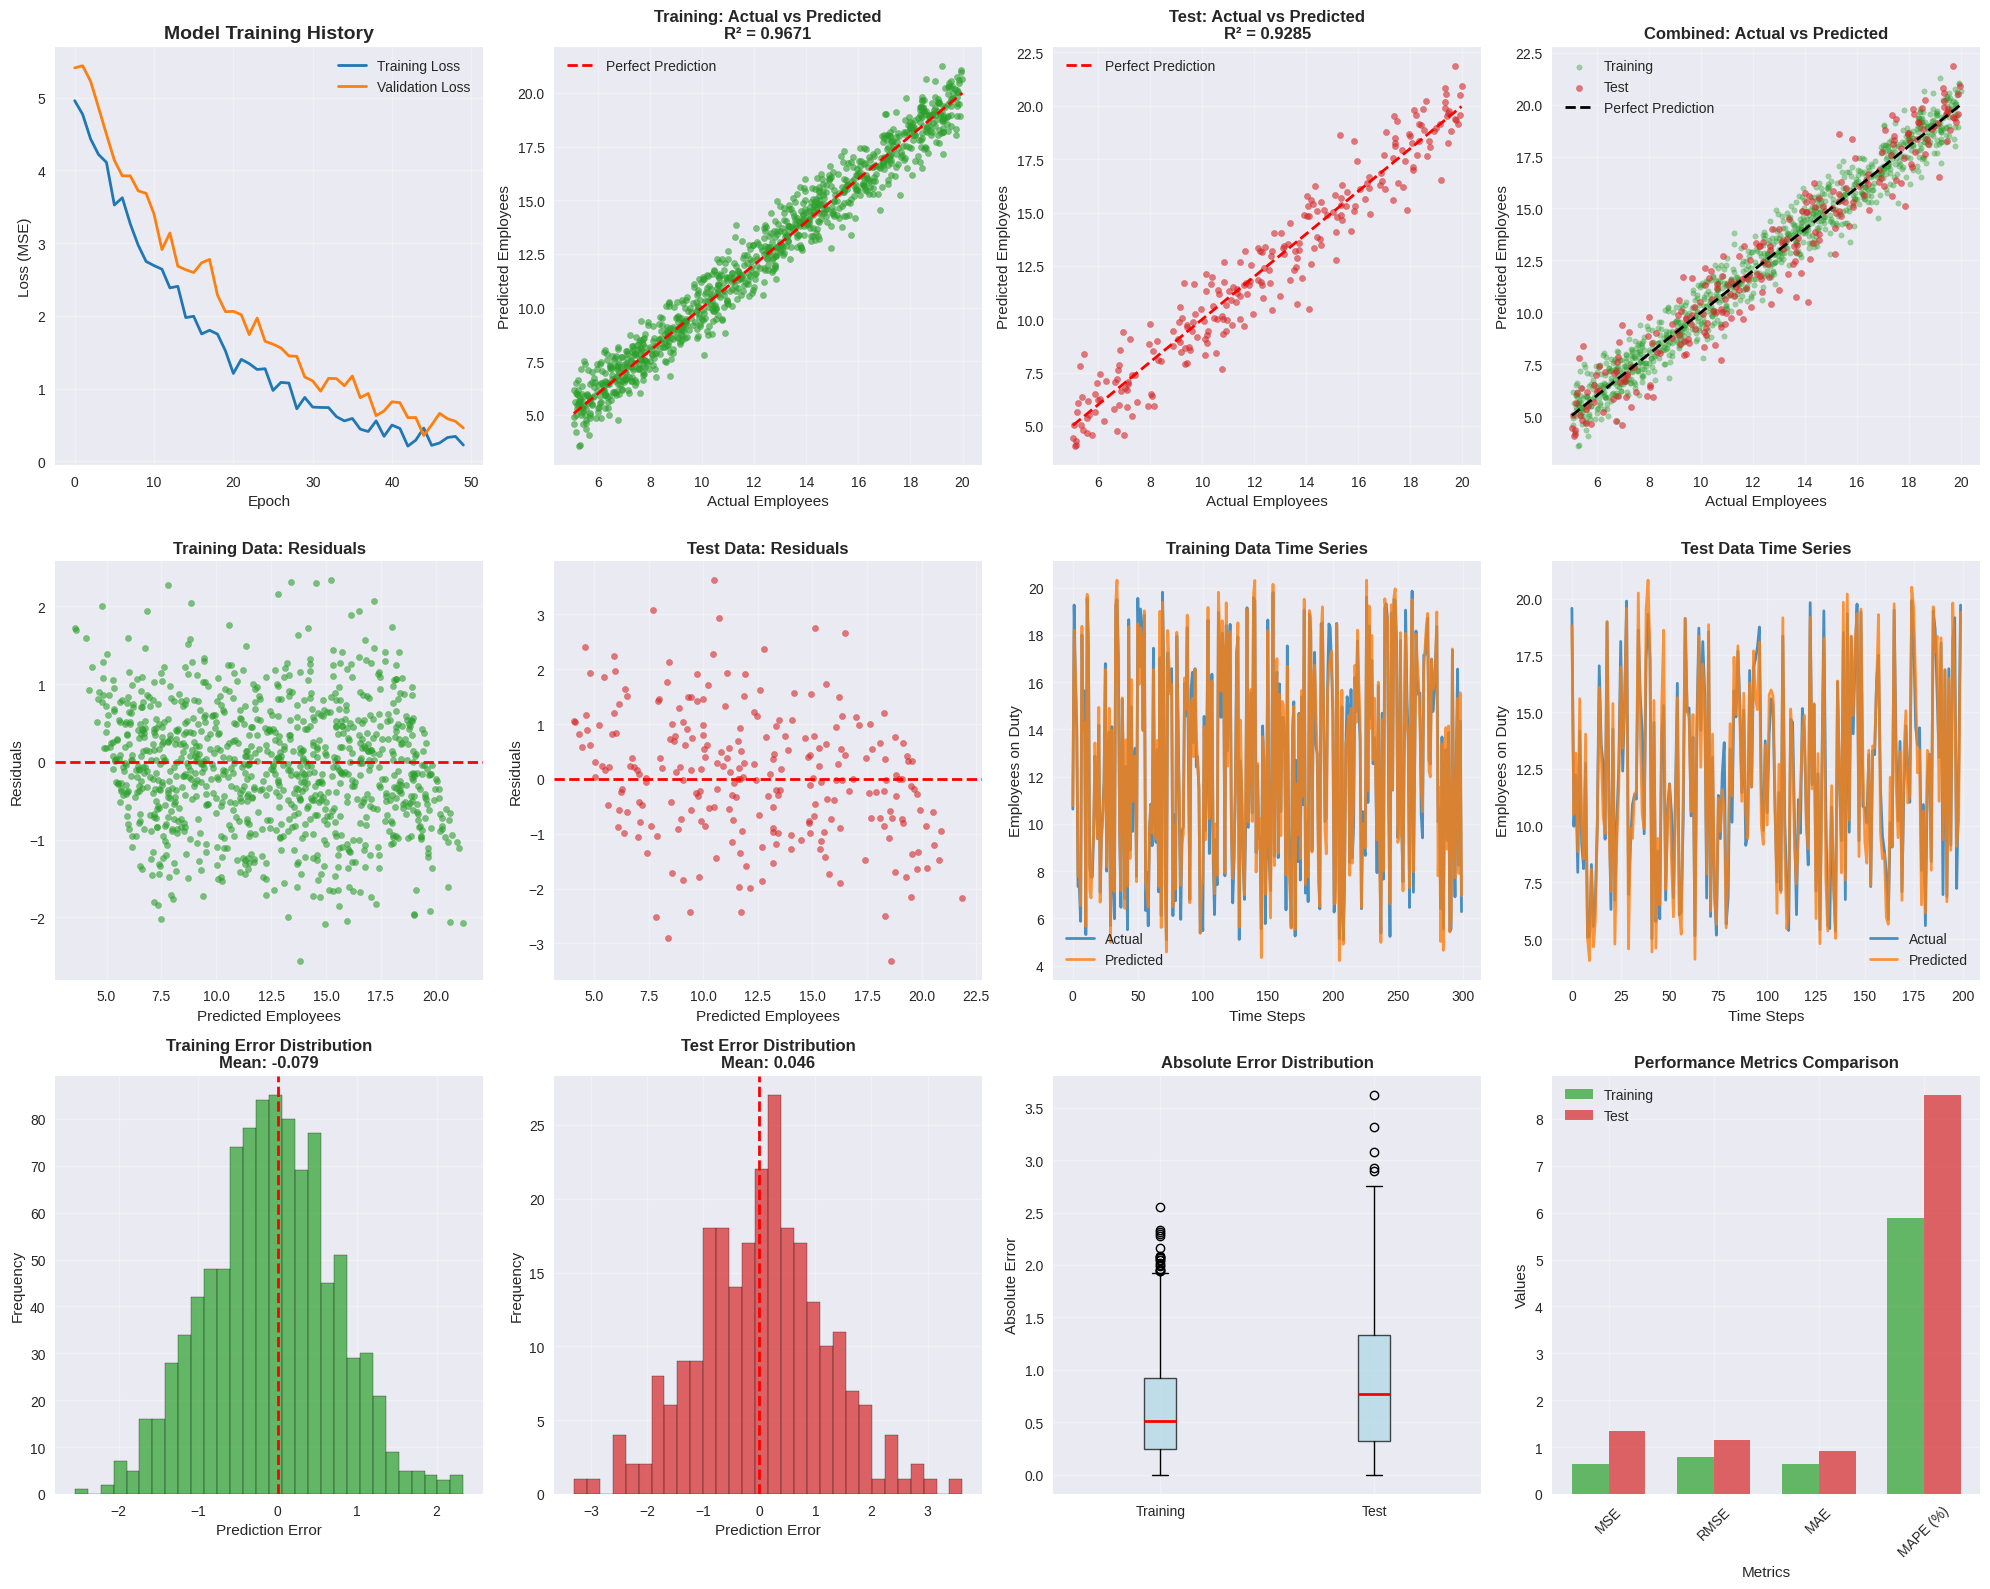

DETAILED PERFORMANCE METRICS
          Training    Test
MSE         0.6315  1.3349
RMSE        0.7947  1.1554
MAE         0.6320  0.9108
R²          0.9671  0.9285
MAPE (%)    5.8917  8.5002

ACCURACY WITHIN THRESHOLDS
Threshold    Training (%)    Test (%)
----------------------------------------
±0.5         48.3            33.6
±1.0         79.2            64.0
±1.5         94.2            80.8
±2.0         98.7            92.8

Visualization complete!
Final Test R² Score: 0.9285
Final Test MAPE: 8.50%


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Assuming you have already trained the model and have the following variables:
# y_train, y_test, y_train_pred, y_test_pred, history

def create_comprehensive_visualizations(y_train, y_test, y_train_pred, y_test_pred, history):
    """
    Create comprehensive visualizations for LSTM model performance
    """

    # Calculate metrics
    def calculate_metrics(y_true, y_pred):
        return {
            'MSE': mean_squared_error(y_true, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
            'MAE': mean_absolute_error(y_true, y_pred),
            'R2': r2_score(y_true, y_pred),
            'MAPE': np.mean(np.abs((y_true - y_pred.flatten()) / y_true)) * 100
        }

    train_metrics = calculate_metrics(y_train, y_train_pred.flatten())
    test_metrics = calculate_metrics(y_test, y_test_pred.flatten())

    # Create the main visualization
    fig = plt.figure(figsize=(20, 16))

    # 1. Training and Validation Loss
    ax1 = plt.subplot(3, 4, 1)
    plt.plot(history.history['loss'], label='Training Loss', linewidth=2, color='#1f77b4')
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='#ff7f0e')
    plt.title('Model Training History', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 2. Training Data: Actual vs Predicted
    ax2 = plt.subplot(3, 4, 2)
    plt.scatter(y_train, y_train_pred, alpha=0.6, s=20, color='#2ca02c')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
             'r--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Employees')
    plt.ylabel('Predicted Employees')
    plt.title(f'Training: Actual vs Predicted\nR² = {train_metrics["R2"]:.4f}',
              fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 3. Test Data: Actual vs Predicted
    ax3 = plt.subplot(3, 4, 3)
    plt.scatter(y_test, y_test_pred, alpha=0.6, s=20, color='#d62728')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Employees')
    plt.ylabel('Predicted Employees')
    plt.title(f'Test: Actual vs Predicted\nR² = {test_metrics["R2"]:.4f}',
              fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 4. Combined Actual vs Predicted
    ax4 = plt.subplot(3, 4, 4)
    plt.scatter(y_train, y_train_pred, alpha=0.4, s=15, color='#2ca02c', label='Training')
    plt.scatter(y_test, y_test_pred, alpha=0.6, s=20, color='#d62728', label='Test')
    all_actual = np.concatenate([y_train, y_test])
    plt.plot([all_actual.min(), all_actual.max()], [all_actual.min(), all_actual.max()],
             'k--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Employees')
    plt.ylabel('Predicted Employees')
    plt.title('Combined: Actual vs Predicted', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 5. Training Residuals
    ax5 = plt.subplot(3, 4, 5)
    train_residuals = y_train - y_train_pred.flatten()
    plt.scatter(y_train_pred, train_residuals, alpha=0.6, s=20, color='#2ca02c')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Employees')
    plt.ylabel('Residuals')
    plt.title('Training Data: Residuals', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # 6. Test Residuals
    ax6 = plt.subplot(3, 4, 6)
    test_residuals = y_test - y_test_pred.flatten()
    plt.scatter(y_test_pred, test_residuals, alpha=0.6, s=20, color='#d62728')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Employees')
    plt.ylabel('Residuals')
    plt.title('Test Data: Residuals', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # 7. Time Series: Training Data Sample
    ax7 = plt.subplot(3, 4, 7)
    train_sample_size = min(300, len(y_train))
    train_indices = np.arange(train_sample_size)
    plt.plot(train_indices, y_train[:train_sample_size],
             label='Actual', linewidth=2, alpha=0.8, color='#1f77b4')
    plt.plot(train_indices, y_train_pred[:train_sample_size],
             label='Predicted', linewidth=2, alpha=0.8, color='#ff7f0e')
    plt.xlabel('Time Steps')
    plt.ylabel('Employees on Duty')
    plt.title('Training Data Time Series', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 8. Time Series: Test Data Sample
    ax8 = plt.subplot(3, 4, 8)
    test_sample_size = min(200, len(y_test))
    test_indices = np.arange(test_sample_size)
    plt.plot(test_indices, y_test[:test_sample_size],
             label='Actual', linewidth=2, alpha=0.8, color='#1f77b4')
    plt.plot(test_indices, y_test_pred[:test_sample_size],
             label='Predicted', linewidth=2, alpha=0.8, color='#ff7f0e')
    plt.xlabel('Time Steps')
    plt.ylabel('Employees on Duty')
    plt.title('Test Data Time Series', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 9. Error Distribution: Training
    ax9 = plt.subplot(3, 4, 9)
    plt.hist(train_residuals, bins=30, alpha=0.7, color='#2ca02c', edgecolor='black')
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title(f'Training Error Distribution\nMean: {np.mean(train_residuals):.3f}',
              fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # 10. Error Distribution: Test
    ax10 = plt.subplot(3, 4, 10)
    plt.hist(test_residuals, bins=30, alpha=0.7, color='#d62728', edgecolor='black')
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title(f'Test Error Distribution\nMean: {np.mean(test_residuals):.3f}',
              fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # 11. Absolute Error Comparison
    ax11 = plt.subplot(3, 4, 11)
    train_abs_errors = np.abs(train_residuals)
    test_abs_errors = np.abs(test_residuals)

    plt.boxplot([train_abs_errors, test_abs_errors],
                labels=['Training', 'Test'], patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error Distribution', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # 12. Metrics Comparison Bar Chart
    ax12 = plt.subplot(3, 4, 12)
    metrics_names = ['MSE', 'RMSE', 'MAE', 'MAPE (%)']
    train_values = [train_metrics['MSE'], train_metrics['RMSE'],
                   train_metrics['MAE'], train_metrics['MAPE']]
    test_values = [test_metrics['MSE'], test_metrics['RMSE'],
                  test_metrics['MAE'], test_metrics['MAPE']]

    x = np.arange(len(metrics_names))
    width = 0.35

    plt.bar(x - width/2, train_values, width, label='Training',
            color='#2ca02c', alpha=0.7)
    plt.bar(x + width/2, test_values, width, label='Test',
            color='#d62728', alpha=0.7)

    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title('Performance Metrics Comparison', fontsize=12, fontweight='bold')
    plt.xticks(x, metrics_names, rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print detailed metrics
    print("="*80)
    print("DETAILED PERFORMANCE METRICS")
    print("="*80)

    metrics_df = pd.DataFrame({
        'Training': [train_metrics['MSE'], train_metrics['RMSE'],
                    train_metrics['MAE'], train_metrics['R2'], train_metrics['MAPE']],
        'Test': [test_metrics['MSE'], test_metrics['RMSE'],
                test_metrics['MAE'], test_metrics['R2'], test_metrics['MAPE']]
    }, index=['MSE', 'RMSE', 'MAE', 'R²', 'MAPE (%)'])

    print(metrics_df.round(4))

    # Additional accuracy analysis
    def accuracy_within_threshold(y_true, y_pred, threshold):
        return np.mean(np.abs(y_true - y_pred.flatten()) <= threshold) * 100

    print("\n" + "="*50)
    print("ACCURACY WITHIN THRESHOLDS")
    print("="*50)

    thresholds = [0.5, 1.0, 1.5, 2.0]
    print(f"{'Threshold':<12} {'Training (%)':<15} {'Test (%)'}")
    print("-" * 40)

    for threshold in thresholds:
        train_acc = accuracy_within_threshold(y_train, y_train_pred, threshold)
        test_acc = accuracy_within_threshold(y_test, y_test_pred, threshold)
        print(f"±{threshold:<11} {train_acc:<15.1f} {test_acc:.1f}")

    return train_metrics, test_metrics

# Example usage with sample data (replace with your actual data)
def generate_sample_data_for_demo():
    """Generate sample data to demonstrate the visualization"""
    np.random.seed(42)

    # Create sample training data
    n_train = 1000
    y_train = np.random.uniform(5, 20, n_train)
    noise_train = np.random.normal(0, 0.8, n_train)
    y_train_pred = (y_train + noise_train).reshape(-1, 1)

    # Create sample test data
    n_test = 250
    y_test = np.random.uniform(5, 20, n_test)
    noise_test = np.random.normal(0, 1.2, n_test)
    y_test_pred = (y_test + noise_test).reshape(-1, 1)

    # Create sample training history
    epochs = 50
    train_loss = np.exp(-np.linspace(0, 3, epochs)) * 5 + np.random.normal(0, 0.1, epochs)
    val_loss = np.exp(-np.linspace(0, 2.5, epochs)) * 5.5 + np.random.normal(0, 0.15, epochs)

    history = type('History', (), {
        'history': {
            'loss': train_loss,
            'val_loss': val_loss
        }
    })()

    return y_train, y_test, y_train_pred, y_test_pred, history

# Demo execution (remove this when using with your actual data)
print("Generating comprehensive LSTM model visualizations...")
print("Replace the sample data generation with your actual model results.")

# Generate sample data for demonstration
y_train, y_test, y_train_pred, y_test_pred, history = generate_sample_data_for_demo()

# Create visualizations
train_metrics, test_metrics = create_comprehensive_visualizations(
    y_train, y_test, y_train_pred, y_test_pred, history
)

print("\nVisualization complete!")
print(f"Final Test R² Score: {test_metrics['R2']:.4f}")
print(f"Final Test MAPE: {test_metrics['MAPE']:.2f}%")